## B8. DEM slope calculation:

#### -1 get documentation of gdal.DEMProcessing()

In [1]:
from osgeo import gdal
import inspect

In [2]:
inspect.getdoc(gdal.DEMProcessing)

'Apply a DEM processing.\nArguments are :\n  destName --- Output dataset name\n  srcDS --- a Dataset object or a filename\n  processing --- one of "hillshade", "slope", "aspect", "color-relief", "TRI", "TPI", "Roughness"\nKeyword arguments are :\n  options --- return of gdal.DEMProcessingOptions(), string or array of strings\n  other keywords arguments of gdal.DEMProcessingOptions()\nIf options is provided as a gdal.DEMProcessingOptions() object, other keywords are ignored. '

In [3]:
inspect.getfile(gdal.DEMProcessingOptions)

'C:\\Users\\Kamil\\Anaconda3\\lib\\site-packages\\osgeo\\gdal.py'

#### 0 Load necessary libraries

In [6]:
from os import listdir
from os.path import isfile, join
import numpy as np
import seaborn as sns

# EOLearn libraries:
from eolearn.core import EOTask, EOPatch, LinearWorkflow, LoadTask, SaveTask, FeatureType, EOExecutor
from eolearn.core import OverwritePermission

# Add to python path parent dictionary (to have acces to the data and util catalogue)
import sys
sys.path.append("../../")

# load site dependant constants (HERE YOU CAN CHOOSE DIFFERENT LOCATION)
from aoi_sites import upe_promice_area as site

# load utility functions
from utils import io_functions as io_utils
from utils import plot_functions as plot_utils

In [7]:
CHOSEN_DATE_RANGE = site.DATE_RANGES_LANDSAT_8[0]
DATETIME_ID = 2
EO_PATCH_NAME = '2969_maxcc_0.05_x-3_y-130'

PATCH_FILEPATH = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[1], site.SITE_NAME, site.AVAILABLE_CRSs[0], CHOSEN_DATE_RANGE)

In [8]:
eo_patch = EOPatch.load(PATCH_FILEPATH+EO_PATCH_NAME)
eo_patch

EOPatch(
  data: {
    DATASET_CLD_200_dil_6_str2: numpy.ndarray(shape=(7, 333, 333, 11), dtype=float32)
    LANDSAT_EUC_NORM_RAW_BANDS: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_GREEN_NIR: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_ICE: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_NIR_SWIR_1: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_NIR_SWIR_2: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    LANDSAT_QA_LAYERS: numpy.ndarray(shape=(7, 333, 333, 5), dtype=float32)
    LANDSAT_RAW_BANDS: numpy.ndarray(shape=(7, 333, 333, 11), dtype=float32)
    MODIS_EUC_NORM_RAW_BANDS: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    MODIS_NDWI: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    MODIS_NRB: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    MODIS_RAW_BANDS_DAY_0: numpy.ndarray(shape

In [9]:
eopatch_dem = eo_patch.data_timeless['DEM_RAW_LAYER']

In [10]:
import matplotlib.pyplot as plt
def plot_matrix(eopatch_dem):
    fig = plt.figure(figsize=(10, 10)) 
    plt.imshow(eopatch_dem.squeeze())
    plt.xticks([])
    plt.yticks([])
    return

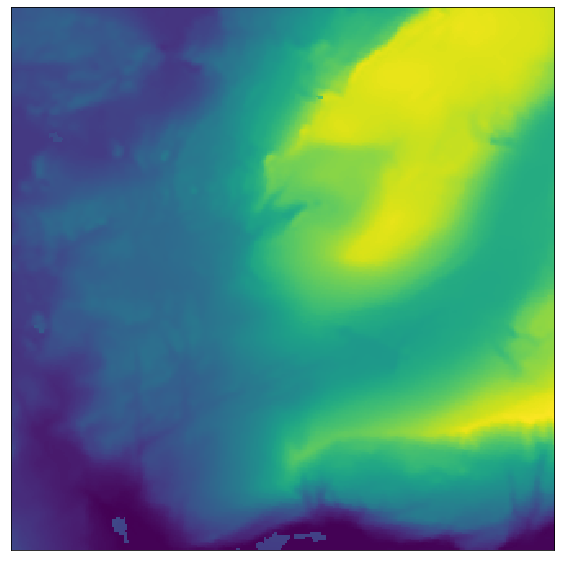

In [15]:
plot_matrix(eopatch_dem)

2013-09-30 15:26:24
Ploting...


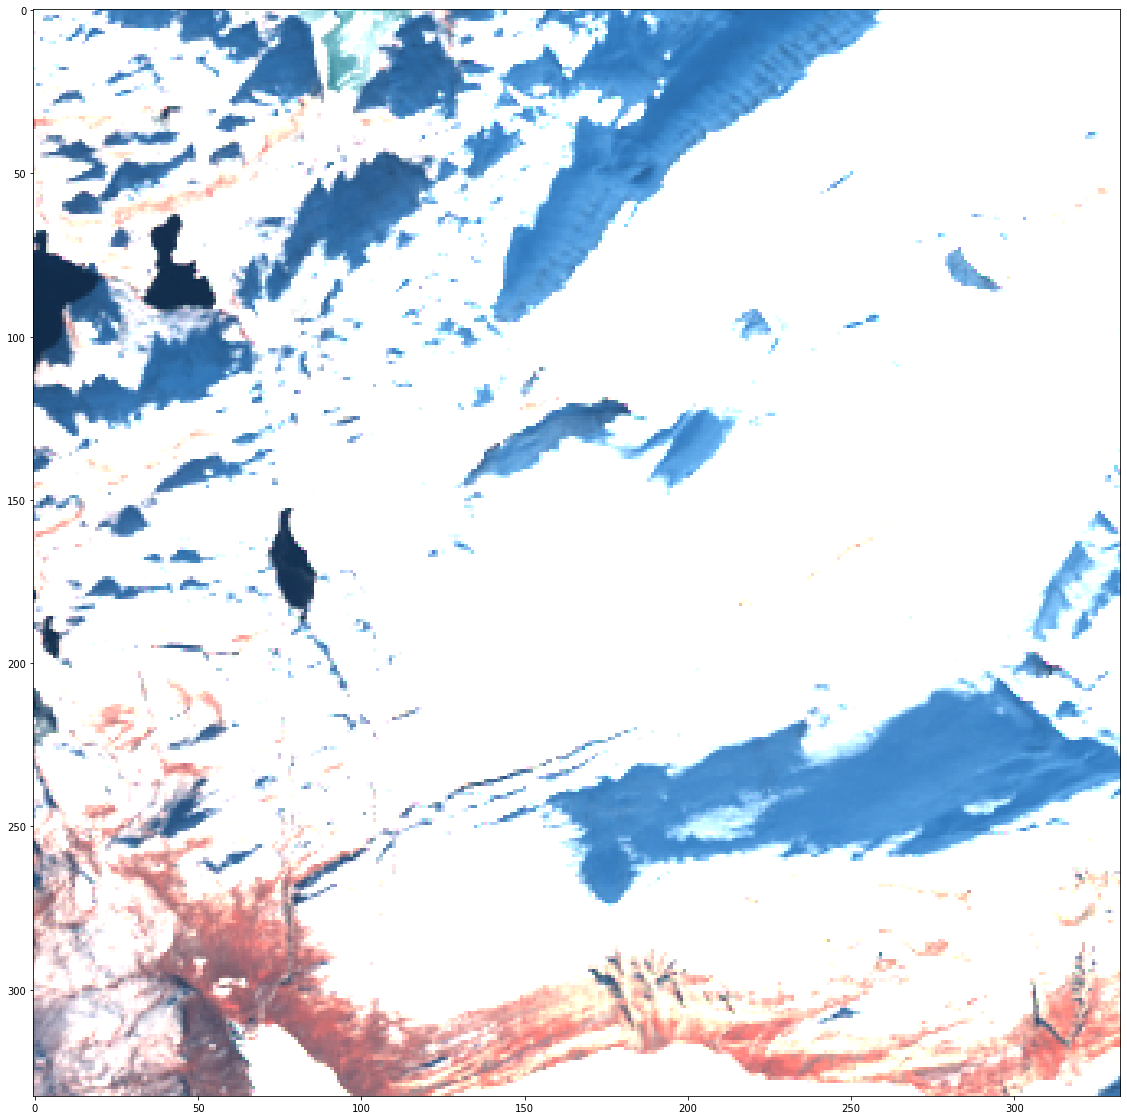

In [39]:
plot_utils.plot_RGB_LANDSAT_8_image(eo_patch, datetime_idx=6)

In [16]:
new_dataset = rasterio.open('DEM.tif', 'w', driver='GTiff',
                            height = eopatch_dem.shape[0], width = eopatch_dem.shape[1],
                            count=1, dtype=str(eopatch_dem.dtype),
                            )
new_dataset.write(eopatch_dem.squeeze(), 1)
new_dataset.close()

C:\Users\Kamil\Anaconda3\lib\site-packages\rasterio\__init__.py:225: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  **kwargs)


In [17]:
from osgeo import gdal
import numpy as np
import rasterio


def calculate_slope(DEM, alg = 'Horn'):
    #alg = 'ZevenbergenThorne'
    options = gdal.DEMProcessingOptions(computeEdges = True, alg = alg)
    gdal.DEMProcessing('slope.tif', DEM, 'slope', options=options)
    with rasterio.open('slope.tif') as dataset:
        slope=dataset.read(1)
    return slope

def calculate_aspect(DEM, alg = 'Horn'):
    #alg = 'ZevenbergenThorne'
    options = gdal.DEMProcessingOptions(computeEdges = True, alg = alg)
    gdal.DEMProcessing('aspect.tif', DEM, 'aspect', options=options)
    with rasterio.open('aspect.tif') as dataset:
        aspect=dataset.read(1)
    return aspect

slope=calculate_slope('DEM.tif')#, alg = 'ZevenbergenThorne')
aspect=calculate_aspect('DEM.tif')#, alg = 'ZevenbergenThorne')

print(type(slope))
print(slope.dtype)
print(slope.shape)

<class 'numpy.ndarray'>
float32
(333, 333)


In [18]:
slope

array([[78.23729 , 82.337746, 81.80781 , ..., 63.6122  , 63.6122  ,
        26.565052],
       [76.91152 , 79.41313 , 81.10021 , ..., 67.19467 , 58.467888,
        45.      ],
       [68.19859 , 72.57888 , 78.64155 , ..., 69.16712 , 58.467888,
        53.395725],
       ...,
       [74.39112 , 77.981255, 83.25831 , ...,  0.      ,  0.      ,
         0.      ],
       [72.29511 , 76.61344 , 82.51949 , ...,  0.      ,  0.      ,
         0.      ],
       [58.007183, 73.9375  , 81.635   , ...,  0.      ,  0.      ,
         0.      ]], dtype=float32)

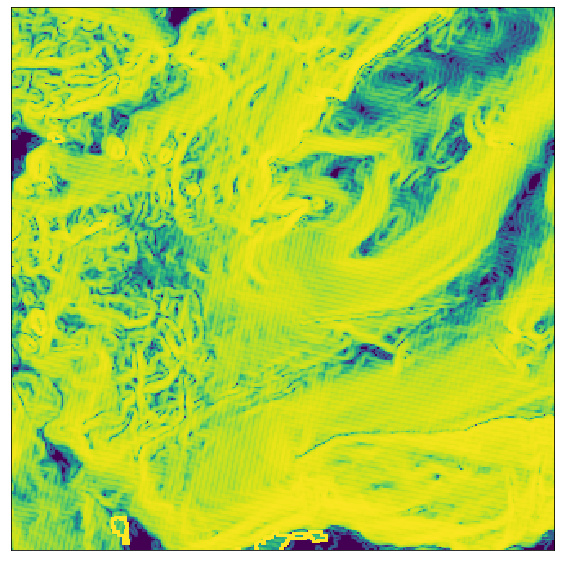

In [19]:
# product of 'ZevenbergenThorne' algorithm (better for smooth sufraces)
plot_matrix(slope)

#### ASPECT

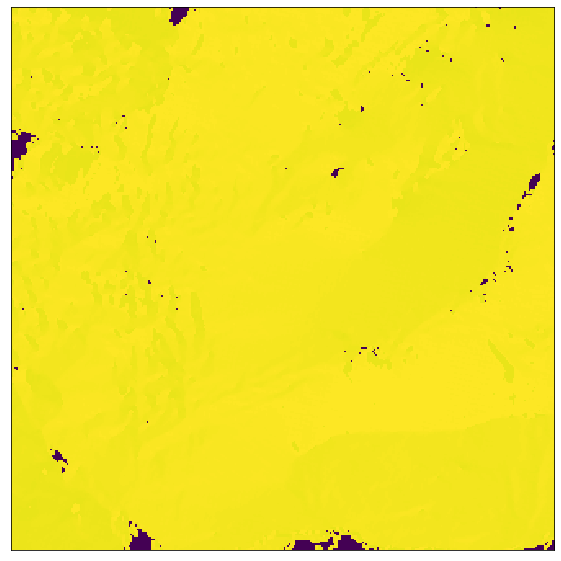

In [20]:
plot_matrix(aspect) 

In [21]:
aspect

array([[   38.65981 ,    42.27369 ,    30.256435, ...,    97.125015,
           97.125015,    90.      ],
       [   54.462322,    37.405357,    40.23636 , ...,    93.01279 ,
           94.398705,    90.      ],
       [   53.130104,    41.82017 ,    51.115505, ...,    87.27369 ,
           94.398705,   111.80141 ],
       ...,
       [   65.22486 ,    64.798874,    71.029594, ..., -9999.      ,
        -9999.      , -9999.      ],
       [   61.38954 ,    59.620872,    66.80141 , ..., -9999.      ,
        -9999.      , -9999.      ],
       [   38.65981 ,    59.74356 ,    72.89727 , ..., -9999.      ,
        -9999.      , -9999.      ]], dtype=float32)

**Takeway** aspect is wrong thing to add to the dataset but slope it is a necessary thing along the height, Therefore,  Horn method is chosen bc it takes into account also the diagonal 

#### 1. Set up and execute EOWorkflow

In [23]:
from osgeo import gdal
import numpy as np
import rasterio

def process_dem(DEM='DEM.tif', processing_mode='slope'):
    # alg = 'Horn' alg = 'ZevenbergenThorne'
    options = gdal.DEMProcessingOptions(computeEdges = True, alg = 'Horn')
    gdal.DEMProcessing(processing_mode+'.tif', DEM, processing_mode, options=options )
    with rasterio.open(processing_mode+'.tif') as dataset:
        product=dataset.read(1)
    return product

slope=process_dem(DEM='DEM.tif', processing_mode = 'slope')
aspect=process_dem(DEM='DEM.tif', processing_mode = 'slope')
#aspect=calculate_aspect('DEM.tif')

#print(type(slope))
#print(slope.dtype)
#print(slope.shape)

# defining eo_task for DEM slope calculation
import numpy.ma as ma
class DEMSlopeCalculation(EOTask):   
    """
    The tasks produces DEM slope calculation with gdal and rasterio library:
    """
    def __init__(self, input_feature_name='DEM_RAW_LAYER', output_feature_name='DEM_SLOPE_LAYER' , output_mask_name='DEM_SLOPE_MASK', mask_range = 1, mode='slope'):
        self.input_feature_name = input_feature_name
        self.output_feature_name = output_feature_name
        self.output_mask_name = output_mask_name
        self.mask_range = mask_range
        #processing --- one of "hillshade", "slope", "aspect", "color-relief", "TRI", "TPI", "Roughness"
        self.mode = mode
        
    def execute(self, eopatch):
        
        # extract DEM LAYER from EOPatch:
        dem_band = eopatch.data_timeless[self.input_feature_name][..., 0]
        
        # create rasterio shadow dataset reference that is needed to perform gdal.
        new_dataset = rasterio.open('DEM.tif', 'w', driver='GTiff',
                            height = dem_band.shape[0], width = dem_band.shape[1],
                            count=1, dtype=str(eopatch_dem.dtype)
                            )
        new_dataset.write(dem_band, 1)
        new_dataset.close()
        
        # process eopatch and save results:
        slope=process_dem('DEM.tif', processing_mode = self.mode )
        eopatch.add_feature(FeatureType.DATA_TIMELESS, self.output_feature_name, slope[..., np.newaxis])

        # produce timeless frame mask
        mask = np.full(dem_band.shape, False) # create a mask with the image's shape         
        mask[self.mask_range:-self.mask_range,self.mask_range:-self.mask_range] = True 
        # save mask
        eopatch.add_feature(FeatureType.MASK_TIMELESS, self.output_mask_name, mask[..., np.newaxis])
        
        return eopatch

#### 2. Set up and execute EOWorkflow

In [24]:
# creating eo tasks producing DEM slope and mask from DEM layer
calculate_DEM_slope_eotask = DEMSlopeCalculation()

for date_range_landsat in site.DATE_RANGES_LANDSAT_8 :
    print('Reading EOPatches from:', date_range_landsat )
    eopatches_filepath = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[1], site.SITE_NAME, site.AVAILABLE_CRSs[0], date_range_landsat)
    # TASK TO LOAD AND SAVE EXISTING EOPATCHES HAS TO BE CREATED YEARLY (different directories)
    load_eotask = LoadTask(eopatches_filepath)
    save_eotask = SaveTask(eopatches_filepath, overwrite_permission=OverwritePermission.OVERWRITE_PATCH, compress_level=1)
    
    # Define the workflow
    workflow = LinearWorkflow(
    load_eotask,
    calculate_DEM_slope_eotask,
    save_eotask
    )
                      
    list_of_available_patches = io_utils.get_list_of_eopatches(eopatches_filepath)
    execution_args = []
    for eopatch_name in list_of_available_patches:
        execution_args.append({
        load_eotask: {'eopatch_folder': eopatch_name},
        save_eotask: {'eopatch_folder': eopatch_name}
        })
    
    #print(execution_args)                            
    executor = EOExecutor(workflow, execution_args, save_logs=True)
    executor.run(workers=1, multiprocess=False)

    executor.make_report()


Reading EOPatches from: ('2013-05-01', '2013-10-31')


C:\Users\Kamil\Anaconda3\lib\site-packages\jinja2\utils.py:485: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
C:\Users\Kamil\Anaconda3\lib\site-packages\holoviews\core\data\grid.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import OrderedDict, defaultdict, Iterable
C:\Users\Kamil\Anaconda3\lib\site-packages\holoviews\operation\datashader.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable, Iterable
C:\Users\Kamil\Anaconda3\lib\site-packages\numba\npyufunc\dufunc.py:86: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargs

Reading EOPatches from: ('2014-05-01', '2014-10-31')


C:\Users\Kamil\Anaconda3\lib\site-packages\rasterio\__init__.py:225: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  **kwargs)



Reading EOPatches from: ('2015-05-01', '2015-10-31')



Reading EOPatches from: ('2016-05-01', '2016-10-31')



Reading EOPatches from: ('2017-05-01', '2017-10-31')



Reading EOPatches from: ('2018-05-01', '2018-10-31')



Reading EOPatches from: ('2019-05-01', '2019-10-31')


In [126]:
eo_patch = EOPatch.load(PATCH_FILEPATH+EO_PATCH_NAME)
eo_patch

EOPatch(
  data: {
    LANDSAT_EUC_NORM_RAW_BANDS: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_GREEN_NIR: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_ICE: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_NIR_SWIR_1: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_NIR_SWIR_2: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    LANDSAT_QA_LAYERS: numpy.ndarray(shape=(7, 333, 333, 5), dtype=float32)
    LANDSAT_RAW_BANDS: numpy.ndarray(shape=(7, 333, 333, 11), dtype=float32)
    MODIS_EUC_NORM_RAW_BANDS: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    MODIS_NDWI: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    MODIS_NRB: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    MODIS_RAW_BANDS_DAY_0: numpy.ndarray(shape=(7, 333, 333, 7), dtype=float32)
    MODIS_RAW_BANDS_DAY_AFTER: numpy.ndarray(shape=(

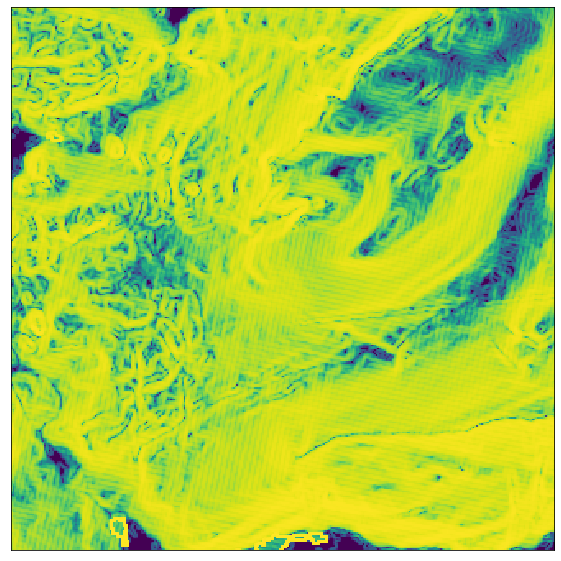

In [127]:
plot_matrix(eo_patch.data_timeless['DEM_SLOPE_LAYER'].squeeze()[1:332,1:332])

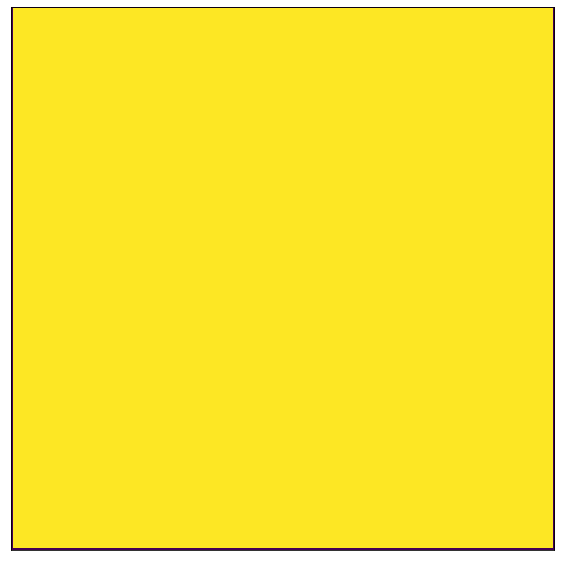

In [128]:
plot_matrix(eo_patch.mask_timeless['DEM_SLOPE_MASK'].squeeze())